In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax')
])


C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7668 - loss: 0.6469 - val_accuracy: 0.7070 - val_loss: 0.9053
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7778 - loss: 0.6146 - val_accuracy: 0.7077 - val_loss: 0.9127
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7797 - loss: 0.5977 - val_accuracy: 0.7078 - val_loss: 0.9444
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7832 - loss: 0.5901 - val_accuracy: 0.7016 - val_loss: 0.9647
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7902 - loss: 0.5756 - val_accuracy: 0.7087 - val_loss: 0.9547
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7973 - loss: 0.5494 - val_accuracy: 0.7157 - val_loss: 0.9431
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7989 - loss: 0.5454 - val_accuracy: 0.7072 - val_loss: 0.9720
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8011 -

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 5ms/step - accuracy: 0.7000 - loss: 1.4584
Test Accuracy: 70.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


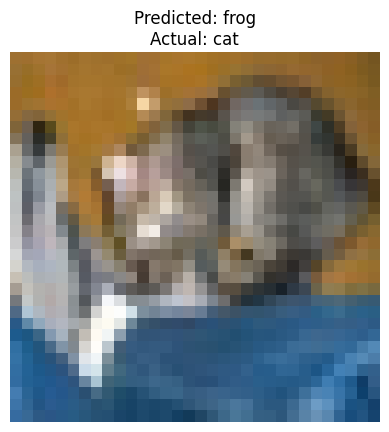

In [7]:
predictions = model.predict(X_test)

import numpy as np

def display_prediction(index):
    plt.imshow(X_test[index])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}\nActual: {class_names[y_test[index][0]]}")
    plt.axis('off')
    plt.show()

display_prediction(0)  
